In [127]:
# import libraries

import pandas as pd
import numpy as np
from statistics import geometric_mean

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [128]:
# import data
def_df = pd.read_csv('ml.csv')
def_df = def_df.drop(['Unnamed: 0'], axis = 1)
def_df = def_df.filter(['NAME', 'RANDOM SEED', 'TIME W/ CUTS', 'TIME W/O CUTS'])

init_df = pd.read_csv('results_1_new.csv')
init_df = init_df.filter(['NAME', 'RANDOM SEED', 'TIME FIRST ROUND', 'TIME ROOT END'])

merged_df = def_df.merge(init_df, on = ['NAME', 'RANDOM SEED'], how = 'left')
merged_df['FIRST ROUND'] = merged_df['TIME FIRST ROUND'] + merged_df['TIME W/O CUTS']
merged_df['ROOT END'] = merged_df['TIME ROOT END'] + merged_df['TIME W/O CUTS']
merged_df

merged_df = merged_df.groupby('NAME').mean()
merged_df = merged_df.reset_index()
merged_df = merged_df.drop(['RANDOM SEED'], axis =1)

In [129]:
# create actual labels
time_1 = []
time_2 = []
time_3 = []

for index, row in merged_df.iterrows():
    if row['TIME W/ CUTS'] > row['TIME W/O CUTS']:
        time_1.append(0)
    elif row['TIME W/ CUTS'] <= row['TIME W/O CUTS']:
        time_1.append(1)

    if row['TIME W/ CUTS'] > row['FIRST ROUND']:
        time_2.append(0)
    elif row['TIME W/ CUTS'] <= row['FIRST ROUND']:
        time_2.append(1)
        
    if row['TIME W/ CUTS'] > row['ROOT END']:
        time_3.append(0)
    elif row['TIME W/ CUTS'] <= row['ROOT END']:
        time_3.append(1)

merged_df['Time 1'] = time_1
merged_df['Time 2'] = time_2
merged_df['Time 3'] = time_3

merged_df

,NAME,TIME W/ CUTS,TIME W/O CUTS,TIME FIRST ROUND,TIME ROOT END,FIRST ROUND,ROOT END,Time 1,Time 2,Time 3
0,10teams.mps.gz,10.997772,12.386720,1.350119,3.312776,13.736838,15.699496,1,1,1
1,22433.mps.gz,2.535930,0.650582,0.172883,2.828100,0.823464,3.478681,0,0,1
2,23588.mps.gz,5.527370,2.399748,0.140688,1.972278,2.540436,4.372027,0,0,0
3,30_70_45_05_100.mps.gz,282.653795,240.079782,18.567687,162.244480,258.647469,402.324263,0,0,1
4,30_70_45_095_100.mps.gz,743.997969,55.714462,19.518728,190.829956,75.233190,246.544417,0,0,0
...,...,...,...,...,...,...,...,...,...,...
421,uct-subprob.mps.gz,3212.414116,18000.010096,0.360338,113.335718,18000.370434,18113.345814,1,1,1
422,umts.mps.gz,1079.840992,11604.852368,0.892776,36.086503,11605.745144,11640.938871,1,1,1
423,unitcal_7.mps.gz,940.799926,10563.733016,64.953906,326.517054,10628.686922,10890.250070,1,1,1
424,var-smallemery-m6j6.mps.gz,7171.038360,10246.224785,79.559820,82.023799,10325.784605,10328.248584,1,1,1


In [130]:
# import predicted label for experiment 1
df_initial = pd.read_csv('initial_plot.csv', index_col=[0])
df_initial = df_initial.filter(['NAME', 'PLabel RF'])
df_initial = df_initial.sort_values(by = ['NAME'], ascending = True)
df_initial.rename(columns ={'PLabel RF':'PLabel 1'}, inplace=True)
df_initial

,NAME,PLabel 1
235,10teams.mps.gz,1
363,22433.mps.gz,0
130,23588.mps.gz,0
198,30_70_45_05_100.mps.gz,0
422,30_70_45_095_100.mps.gz,0
...,...,...
205,uct-subprob.mps.gz,1
34,umts.mps.gz,1
178,unitcal_7.mps.gz,1
260,var-smallemery-m6j6.mps.gz,1


In [131]:
# merge the data 
merged_df = merged_df.merge(df_initial, on = ['NAME'], how = 'left')
merged_df

,NAME,TIME W/ CUTS,TIME W/O CUTS,TIME FIRST ROUND,TIME ROOT END,FIRST ROUND,ROOT END,Time 1,Time 2,Time 3,PLabel 1
0,10teams.mps.gz,10.997772,12.386720,1.350119,3.312776,13.736838,15.699496,1,1,1,1
1,22433.mps.gz,2.535930,0.650582,0.172883,2.828100,0.823464,3.478681,0,0,1,0
2,23588.mps.gz,5.527370,2.399748,0.140688,1.972278,2.540436,4.372027,0,0,0,0
3,30_70_45_05_100.mps.gz,282.653795,240.079782,18.567687,162.244480,258.647469,402.324263,0,0,1,0
4,30_70_45_095_100.mps.gz,743.997969,55.714462,19.518728,190.829956,75.233190,246.544417,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
421,uct-subprob.mps.gz,3212.414116,18000.010096,0.360338,113.335718,18000.370434,18113.345814,1,1,1,1
422,umts.mps.gz,1079.840992,11604.852368,0.892776,36.086503,11605.745144,11640.938871,1,1,1,1
423,unitcal_7.mps.gz,940.799926,10563.733016,64.953906,326.517054,10628.686922,10890.250070,1,1,1,1
424,var-smallemery-m6j6.mps.gz,7171.038360,10246.224785,79.559820,82.023799,10325.784605,10328.248584,1,1,1,1


In [132]:
# import predicted label for experiment 2
df_first = pd.read_csv('first_round_plot.csv', index_col=[0])
df_first = df_first.filter(['NAME', 'PLabel NN'])
df_first = df_first.sort_values(by = ['NAME'], ascending = True)
df_first.rename(columns ={'PLabel NN':'PLabel 2'}, inplace=True)
df_first

,NAME,PLabel 2
235,10teams.mps.gz,1
363,22433.mps.gz,0
130,23588.mps.gz,0
198,30_70_45_05_100.mps.gz,1
422,30_70_45_095_100.mps.gz,1
...,...,...
205,uct-subprob.mps.gz,1
34,umts.mps.gz,0
178,unitcal_7.mps.gz,1
260,var-smallemery-m6j6.mps.gz,1


In [133]:
# merge data
merged_df = merged_df.merge(df_first, on = ['NAME'], how = 'left')
merged_df

,NAME,TIME W/ CUTS,TIME W/O CUTS,TIME FIRST ROUND,TIME ROOT END,FIRST ROUND,ROOT END,Time 1,Time 2,Time 3,PLabel 1,PLabel 2
0,10teams.mps.gz,10.997772,12.386720,1.350119,3.312776,13.736838,15.699496,1,1,1,1,1
1,22433.mps.gz,2.535930,0.650582,0.172883,2.828100,0.823464,3.478681,0,0,1,0,0
2,23588.mps.gz,5.527370,2.399748,0.140688,1.972278,2.540436,4.372027,0,0,0,0,0
3,30_70_45_05_100.mps.gz,282.653795,240.079782,18.567687,162.244480,258.647469,402.324263,0,0,1,0,1
4,30_70_45_095_100.mps.gz,743.997969,55.714462,19.518728,190.829956,75.233190,246.544417,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
421,uct-subprob.mps.gz,3212.414116,18000.010096,0.360338,113.335718,18000.370434,18113.345814,1,1,1,1,1
422,umts.mps.gz,1079.840992,11604.852368,0.892776,36.086503,11605.745144,11640.938871,1,1,1,1,0
423,unitcal_7.mps.gz,940.799926,10563.733016,64.953906,326.517054,10628.686922,10890.250070,1,1,1,1,1
424,var-smallemery-m6j6.mps.gz,7171.038360,10246.224785,79.559820,82.023799,10325.784605,10328.248584,1,1,1,1,1


In [134]:
# import predicted label for experiment 3
df_end = pd.read_csv('root_end_plot.csv', index_col=[0])
df_end = df_end.filter(['NAME', 'PLabel RF'])
df_end = df_end.sort_values(by = ['NAME'], ascending = True)
df_end.rename(columns ={'PLabel RF':'PLabel 3'}, inplace=True)
df_end

,NAME,PLabel 3
235,10teams.mps.gz,1
363,22433.mps.gz,1
130,23588.mps.gz,0
198,30_70_45_05_100.mps.gz,1
422,30_70_45_095_100.mps.gz,1
...,...,...
205,uct-subprob.mps.gz,1
34,umts.mps.gz,1
178,unitcal_7.mps.gz,1
260,var-smallemery-m6j6.mps.gz,1


In [135]:
# merge data
merged_df = merged_df.merge(df_end, on = ['NAME'], how = 'left')
merged_df

,NAME,TIME W/ CUTS,TIME W/O CUTS,TIME FIRST ROUND,TIME ROOT END,FIRST ROUND,ROOT END,Time 1,Time 2,Time 3,PLabel 1,PLabel 2,PLabel 3
0,10teams.mps.gz,10.997772,12.386720,1.350119,3.312776,13.736838,15.699496,1,1,1,1,1,1
1,22433.mps.gz,2.535930,0.650582,0.172883,2.828100,0.823464,3.478681,0,0,1,0,0,1
2,23588.mps.gz,5.527370,2.399748,0.140688,1.972278,2.540436,4.372027,0,0,0,0,0,0
3,30_70_45_05_100.mps.gz,282.653795,240.079782,18.567687,162.244480,258.647469,402.324263,0,0,1,0,1,1
4,30_70_45_095_100.mps.gz,743.997969,55.714462,19.518728,190.829956,75.233190,246.544417,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,uct-subprob.mps.gz,3212.414116,18000.010096,0.360338,113.335718,18000.370434,18113.345814,1,1,1,1,1,1
422,umts.mps.gz,1079.840992,11604.852368,0.892776,36.086503,11605.745144,11640.938871,1,1,1,1,0,1
423,unitcal_7.mps.gz,940.799926,10563.733016,64.953906,326.517054,10628.686922,10890.250070,1,1,1,1,1,1
424,var-smallemery-m6j6.mps.gz,7171.038360,10246.224785,79.559820,82.023799,10325.784605,10328.248584,1,1,1,1,1,1


Create Dataframe for all instances and the distribution

In [136]:
# Default
print(len(merged_df[merged_df['Time 1']==1]))
print(len(merged_df[merged_df['Time 1']==0]))

232
194


In [137]:
# Initial

print(len(merged_df[(merged_df['Time 1']==1) & (merged_df['PLabel 1']==1)]))
print(len(merged_df[(merged_df['Time 1']==1) & (merged_df['PLabel 1']==0)]))
print(len(merged_df[(merged_df['Time 1']==0) & (merged_df['PLabel 1']==1)]))
print(len(merged_df[(merged_df['Time 1']==0) & (merged_df['PLabel 1']==0)]))

217
15
18
176


In [138]:
# First Round

print(len(merged_df[(merged_df['Time 2']==1) & (merged_df['PLabel 2']==1)]))
print(len(merged_df[(merged_df['Time 2']==1) & (merged_df['PLabel 2']==0)]))
print(len(merged_df[(merged_df['Time 2']==0) & (merged_df['PLabel 2']==1)]))
print(len(merged_df[(merged_df['Time 2']==0) & (merged_df['PLabel 2']==0)]))

231
33
56
106


In [139]:
# Root End

print(len(merged_df[(merged_df['Time 3']==1) & (merged_df['PLabel 3']==1)]))
print(len(merged_df[(merged_df['Time 3']==1) & (merged_df['PLabel 3']==0)]))
print(len(merged_df[(merged_df['Time 3']==0) & (merged_df['PLabel 3']==1)]))
print(len(merged_df[(merged_df['Time 3']==0) & (merged_df['PLabel 3']==0)]))

295
5
25
101


In [140]:
d = {'Step': ['Default', 'Initial', 'Round 1', 'End of Root'], 'P1T1': [232,217,231,295], 'P0T1': [0,15,33,5], 'P1T0': [194,18,56,25], 'P0T0': [0,176,106,101]}
df = pd.DataFrame(data=d)
df

,Step,P1T1,P0T1,P1T0,P0T0
0,Default,232,0,194,0
1,Initial,217,15,18,176
2,Round 1,231,33,56,106
3,End of Root,295,5,25,101


Text(0.5, 1.0, 'Distribution of predicted and true labels')

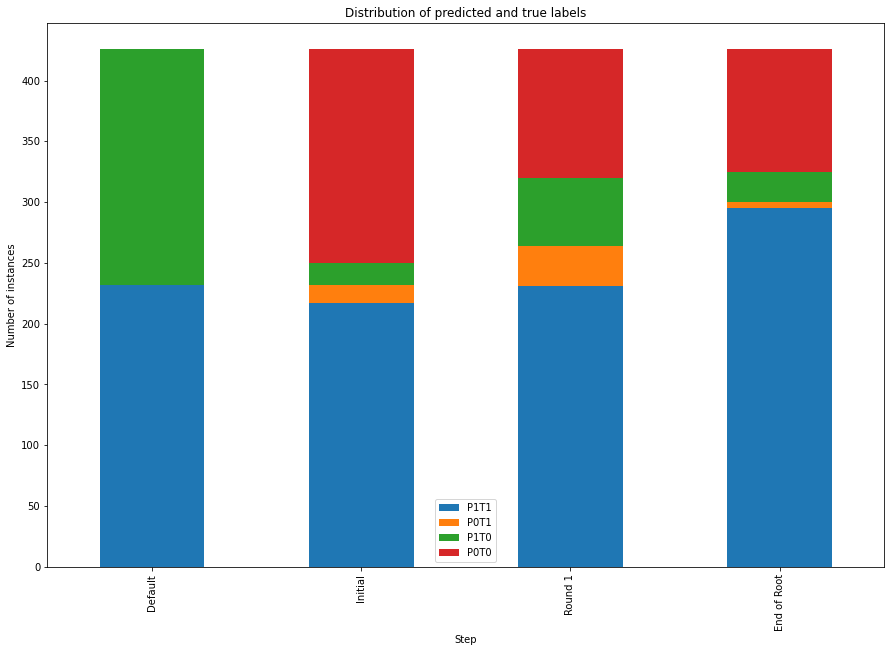

In [141]:
# plot
bars = df.plot.bar(x='Step', stacked=True, figsize=(15, 10), hatch =['/', '.', 'X', 'o'])
plt.ylabel("Number of instances")
plt.title('Distribution of predicted and true labels')

Testing Data

In [142]:
test = pd.read_csv('testing_plot.csv', )
test = test.filter(['NAME'])

In [143]:
test_df = test.merge(merged_df, on = ['NAME'], how = 'left')
test_df

,NAME,TIME W/ CUTS,TIME W/O CUTS,TIME FIRST ROUND,TIME ROOT END,FIRST ROUND,ROOT END,Time 1,Time 2,Time 3,PLabel 1,PLabel 2,PLabel 3
0,neos-780889.mps.gz,176.675456,366.928362,82.125212,103.047991,449.053574,469.976354,1,1,1,1,1,1
1,mzzv11.mps.gz,422.340278,1489.909837,35.412962,60.565992,1525.322799,1550.475830,1,1,1,1,1,1
2,chromaticindex32-8.mps.gz,1.025220,3.402795,0.000000,0.000000,3.402795,3.402795,1,1,1,0,1,0
3,neos22.mps.gz,1.452381,18000.109330,0.286416,0.867208,18000.395746,18000.976538,1,1,1,1,1,1
4,ab67-40-100.mps.gz,300.208641,316.162226,15.087084,15.087084,331.249310,331.249310,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,mik-250-20-75-2.mps.gz,12.884775,24.745723,0.052026,10.689049,24.797749,35.434773,1,1,1,1,1,1
82,30_70_45_095_100.mps.gz,743.997969,55.714462,19.518728,190.829956,75.233190,246.544417,0,0,0,0,1,1
83,neos-4322846-ryton.mps.gz,818.066564,670.952097,174.644219,234.220667,845.596316,905.172764,0,1,1,0,1,1
84,ran14x18-disj-8.mps.gz,1658.803667,16537.715878,0.239374,112.326528,16537.955252,16650.042406,1,1,1,1,1,1


In [144]:
# Default
print(len(test_df[test_df['Time 1']==1]))
print(len(test_df[test_df['Time 1']==0]))

47
39


In [145]:
# Initial

print(len(test_df[(test_df['Time 1']==1) & (test_df['PLabel 1']==1)]))
print(len(test_df[(test_df['Time 1']==1) & (test_df['PLabel 1']==0)]))
print(len(test_df[(test_df['Time 1']==0) & (test_df['PLabel 1']==1)]))
print(len(test_df[(test_df['Time 1']==0) & (test_df['PLabel 1']==0)]))

32
15
18
21


In [146]:
# First Round

print(len(test_df[(test_df['Time 2']==1) & (test_df['PLabel 2']==1)]))
print(len(test_df[(test_df['Time 2']==1) & (test_df['PLabel 2']==0)]))
print(len(test_df[(test_df['Time 2']==0) & (test_df['PLabel 2']==1)]))
print(len(test_df[(test_df['Time 2']==0) & (test_df['PLabel 2']==0)]))

40
14
12
20


In [147]:
# Root End

print(len(test_df[(test_df['Time 3']==1) & (test_df['PLabel 3']==1)]))
print(len(test_df[(test_df['Time 3']==1) & (test_df['PLabel 3']==0)]))
print(len(test_df[(test_df['Time 3']==0) & (test_df['PLabel 3']==1)]))
print(len(test_df[(test_df['Time 3']==0) & (test_df['PLabel 3']==0)]))

55
5
22
4


In [148]:
t = {'Step': ['Default', 'Initial', 'Round 1', 'End of Root'], 'P1T1': [47,32,40,55], 'P0T1': [0,15,14,5], 'P1T0': [39,18,12,22], 'P0T0': [0,21,20,4]}
new_df = pd.DataFrame(data=t)
new_df

,Step,P1T1,P0T1,P1T0,P0T0
0,Default,47,0,39,0
1,Initial,32,15,18,21
2,Round 1,40,14,12,20
3,End of Root,55,5,22,4


Text(0.5, 1.0, 'Distribution of predicted and true labels')

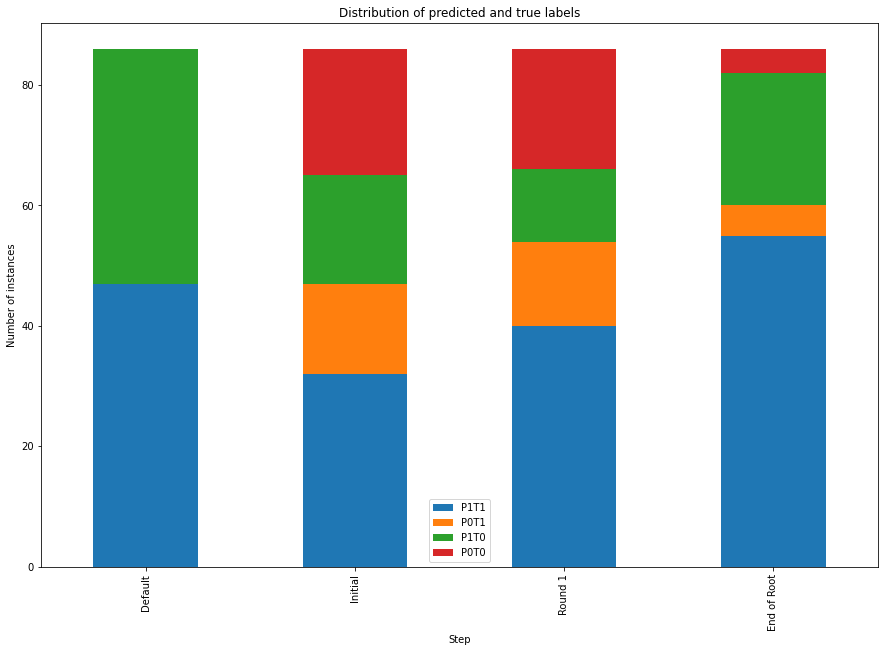

In [149]:
new_df.plot.bar(x='Step', stacked=True, figsize=(15, 10))
plt.ylabel("Number of instances")
plt.title('Distribution of predicted and true labels')

Training Data

In [150]:
train = pd.read_csv('training_plot.csv', )
train = train.filter(['NAME'])

In [151]:
train_df = train.merge(merged_df, on = ['NAME'], how = 'left')
train_df

,NAME,TIME W/ CUTS,TIME W/O CUTS,TIME FIRST ROUND,TIME ROOT END,FIRST ROUND,ROOT END,Time 1,Time 2,Time 3,PLabel 1,PLabel 2,PLabel 3
0,neos-5140963-mincio.mps.gz,16296.812996,17910.818276,0.027525,2829.124553,17910.845801,20739.942829,1,1,1,1,1,1
1,neos8.mps.gz,16.780323,56.483545,16.406966,16.410093,72.890510,72.893637,1,1,1,1,1,1
2,neos-4391920-timok.mps.gz,299.384161,290.133364,556.933012,578.506055,847.066375,868.639419,0,1,1,0,1,1
3,30_70_45_095_98.mps.gz,76.557754,26.326404,13.898364,69.983411,40.224768,96.309816,0,0,1,0,0,1
4,wachplan.mps.gz,1434.605408,1776.538785,2.617340,97.206743,1779.156125,1873.745528,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,ns1644855.mps.gz,860.987882,853.974045,0.000000,0.000000,853.974045,853.974045,0,0,0,0,0,0
336,neos-3065804-namu.mps.gz,11.837614,11.855551,0.000000,0.000000,11.855551,11.855551,1,1,1,1,1,1
337,ic97_tension.mps.gz,20.023839,31.999309,0.067639,5.569328,32.066948,37.568637,1,1,1,1,1,1
338,bppc8-02.mps.gz,0.677820,0.117125,0.052751,0.347415,0.169876,0.464540,0,0,0,0,0,0


In [152]:
# Default
print(len(train_df[train_df['Time 1']==1]))
print(len(train_df[train_df['Time 1']==0]))

185
155


In [153]:
# Initial

print(len(train_df[(train_df['Time 1']==1) & (train_df['PLabel 1']==1)]))
print(len(train_df[(train_df['Time 1']==1) & (train_df['PLabel 1']==0)]))
print(len(train_df[(train_df['Time 1']==0) & (train_df['PLabel 1']==1)]))
print(len(train_df[(train_df['Time 1']==0) & (train_df['PLabel 1']==0)]))

185
0
0
155


In [154]:
# First Round

print(len(train_df[(train_df['Time 2']==1) & (train_df['PLabel 2']==1)]))
print(len(train_df[(train_df['Time 2']==1) & (train_df['PLabel 2']==0)]))
print(len(train_df[(train_df['Time 2']==0) & (train_df['PLabel 2']==1)]))
print(len(train_df[(train_df['Time 2']==0) & (train_df['PLabel 2']==0)]))

191
19
44
86


In [155]:
# Root End

print(len(train_df[(train_df['Time 3']==1) & (train_df['PLabel 3']==1)]))
print(len(train_df[(train_df['Time 3']==1) & (train_df['PLabel 3']==0)]))
print(len(train_df[(train_df['Time 3']==0) & (train_df['PLabel 3']==1)]))
print(len(train_df[(train_df['Time 3']==0) & (train_df['PLabel 3']==0)]))

240
0
3
97


In [156]:
t = {'Step': ['Default', 'Initial', 'Round 1', 'End of Root'], 'P1T1': [185,185,191,240], 'P0T1': [0,0,19,0], 'P1T0': [155,0,44,3], 'P0T0': [0,155,86,97]}
new_df = pd.DataFrame(data=t)
new_df

,Step,P1T1,P0T1,P1T0,P0T0
0,Default,185,0,155,0
1,Initial,185,0,0,155
2,Round 1,191,19,44,86
3,End of Root,240,0,3,97


Text(0.5, 1.0, 'Distribution of predicted and true labels')

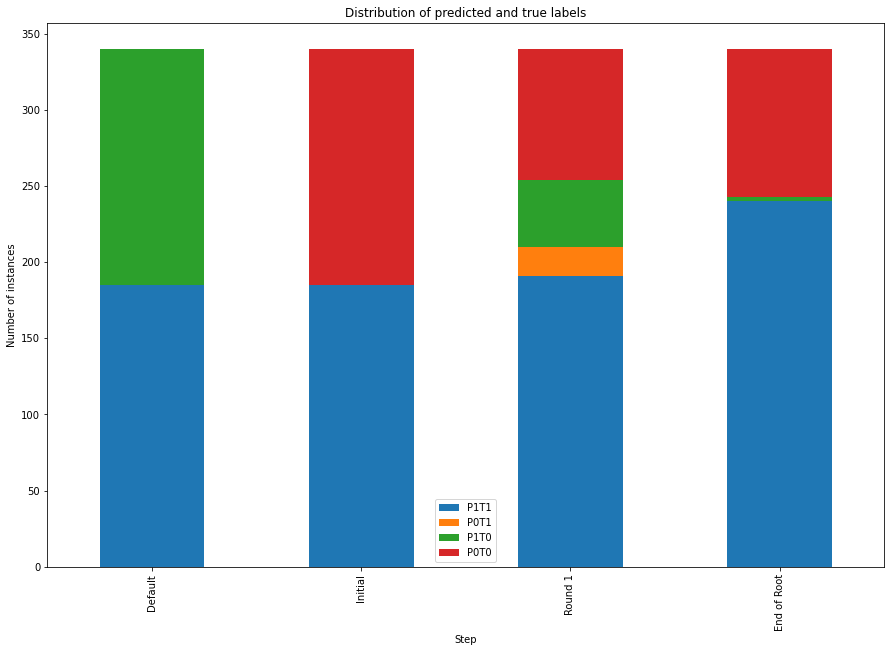

In [157]:
new_df.plot.bar(x='Step', stacked=True, figsize=(15, 10))
plt.ylabel("Number of instances")
plt.title('Distribution of predicted and true labels')